Prior parameters: Alpha=1.0, Beta=1.0
Posterior parameters: Alpha=2.952, Beta=1.716


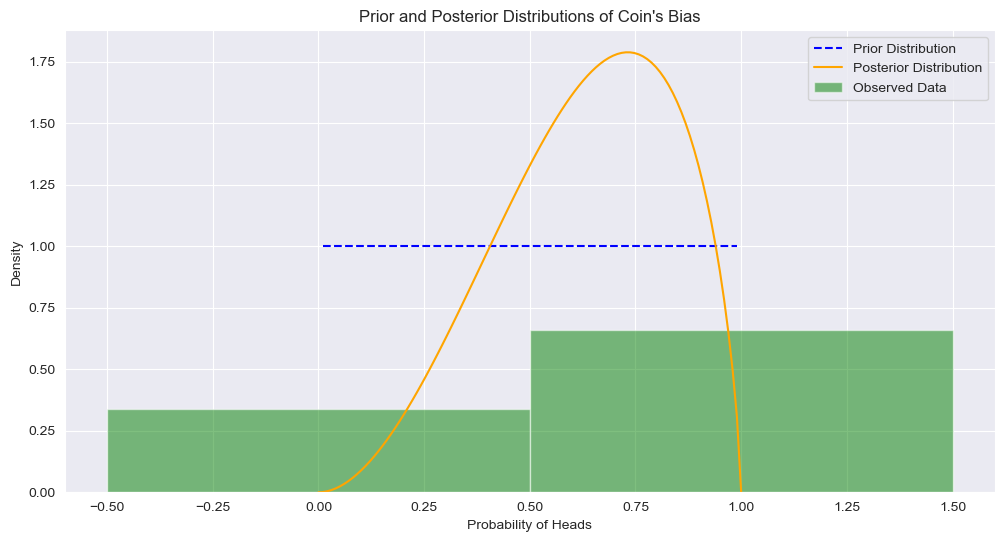

In [4]:
import matplotlib.pyplot as plt

import numpy as np
import torch
from torch.distributions import Binomial, Beta
from torch import nn
from torch.optim import Adam

# Simulate coin flips
np.random.seed(42)
data = np.random.choice([0, 1], size=100, p=[0.3, 0.7])

# Convert data to PyTorch tensor
data_tensor = torch.tensor(data, dtype=torch.float32)

# Define the model
class CoinFlipModel(nn.Module):
    def __init__(self):
        super(CoinFlipModel, self).__init__()
        self.alpha = nn.Parameter(torch.tensor(1.0))
        self.beta = nn.Parameter(torch.tensor(1.0))

    def forward(self, data):
        prior = Beta(self.alpha, self.beta)
        likelihood = Binomial(total_count=1, probs=prior.rsample())
        return likelihood.log_prob(data).sum()

# Initialize the model
model = CoinFlipModel()

# Define SVI parameters
optimizer = Adam(model.parameters(), lr=0.01)
num_steps = 1000

# Stochastic Variational Inference
for step in range(num_steps):
    optimizer.zero_grad()
    loss = -model(data_tensor)
    loss.backward()
    optimizer.step()

# Extract posterior parameters
posterior_alpha = model.alpha.item()
posterior_beta = model.beta.item()

# Results
print(f"Prior parameters: Alpha={1.0}, Beta={1.0}")
print(f"Posterior parameters: Alpha={posterior_alpha:.3f}, Beta={posterior_beta:.3f}")

# Visualization of the Prior and Posterior Distributions
x = np.linspace(0, 1, 100)
prior_dist = Beta(1.0, 1.0)
posterior_dist = Beta(posterior_alpha, posterior_beta)
y_prior = prior_dist.log_prob(torch.tensor(x)).exp()
y_posterior = posterior_dist.log_prob(torch.tensor(x)).exp()

plt.figure(figsize=(12, 6))
plt.plot(x, y_prior, label="Prior Distribution", linestyle='--', color='blue')
plt.plot(x, y_posterior, label="Posterior Distribution", color='orange')
plt.hist(data_tensor.numpy(), bins=[-0.5, 0.5, 1.5], density=True, alpha=0.5, color='green', label='Observed Data')
plt.title("Prior and Posterior Distributions of Coin's Bias")
plt.xlabel("Probability of Heads")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


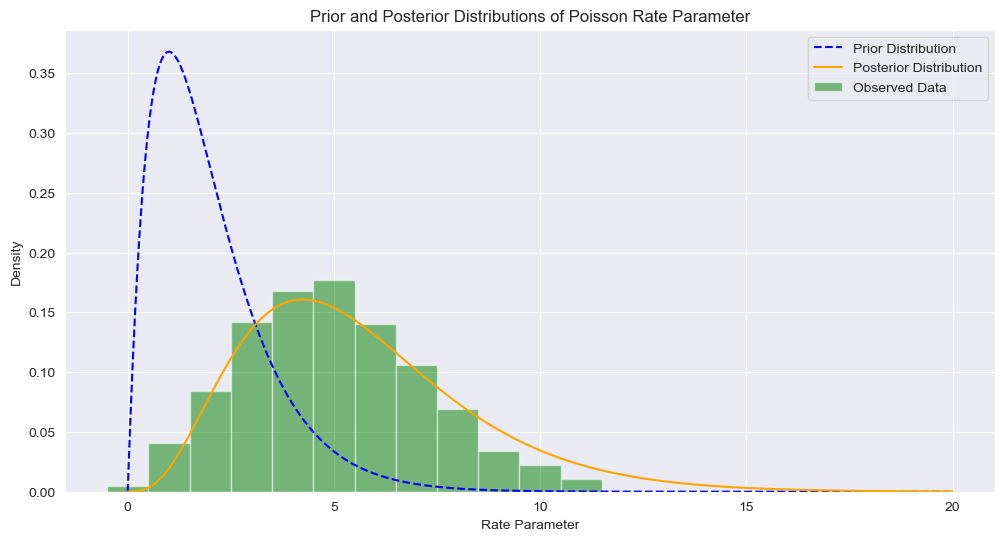

In [9]:
import numpy as np
import torch
from torch.distributions import Poisson, Gamma
from torch import nn
from torch.optim import Adam
import matplotlib.pyplot as plt

# Simulate Poisson-distributed data
np.random.seed(42)
data = np.random.poisson(lam=5, size=100)

# Convert data to PyTorch tensor
data_tensor = torch.tensor(data, dtype=torch.float32)

# Define the model
class GammaPoissonModel(nn.Module):
    def __init__(self):
        super(GammaPoissonModel, self).__init__()
        self.alpha = nn.Parameter(torch.tensor(2.0))
        self.beta = nn.Parameter(torch.tensor(1.0))

    def forward(self, data):
        prior = Gamma(self.alpha, self.beta)
        likelihood = Poisson(rate=prior.rsample())
        return likelihood.log_prob(data).sum()

# Initialize the model
model = GammaPoissonModel()

# Define SVI parameters
optimizer = Adam(model.parameters(), lr=0.01)
num_steps = 1000

# Stochastic Variational Inference
for step in range(num_steps):
    optimizer.zero_grad()
    loss = -model(data_tensor)
    loss.backward()
    optimizer.step()

# Extract posterior parameters
posterior_alpha = model.alpha.item()
posterior_beta = model.beta.item()

# Visualization of the Prior and Posterior Distributions
x = np.linspace(0, 20, 1000)
prior_dist = Gamma(2.0, 1.0)
posterior_dist = Gamma(posterior_alpha, posterior_beta)
y_prior = prior_dist.log_prob(torch.tensor(x)).exp()
y_posterior = posterior_dist.log_prob(torch.tensor(x)).exp()

plt.figure(figsize=(12, 6))
plt.plot(x, y_prior, label="Prior Distribution", linestyle='--', color='blue')
plt.plot(x, y_posterior, label="Posterior Distribution", color='orange')
plt.hist(data_tensor.numpy(), bins=np.arange(-0.5, 20.5, 1), density=True, alpha=0.5, color='green', label='Observed Data')
plt.title("Prior and Posterior Distributions of Poisson Rate Parameter")
plt.xlabel("Rate Parameter")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()
